In [2]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf

In [3]:
#!pip install gdown
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: D:\Git\Courses-and-Certificates\1 - Coursera\DeepLearning.AI TensorFlow Developer\Course 3\Week 2\sarcasm.json

  0%|          | 0.00/5.64M [00:00<?, ?B/s]
  9%|9         | 524k/5.64M [00:00<00:05, 903kB/s]
 19%|#8        | 1.05M/5.64M [00:00<00:04, 1.11MB/s]
 28%|##7       | 1.57M/5.64M [00:01<00:02, 1.49MB/s]
 37%|###7      | 2.10M/5.64M [00:01<00:01, 1.78MB/s]
 46%|####6     | 2.62M/5.64M [00:01<00:01, 1.94MB/s]
 56%|#####5    | 3.15M/5.64M [00:01<00:01, 2.10MB/s]
 65%|######5   | 3.67M/5.64M [00:02<00:00, 2.11MB/s]
 74%|#######4  | 4.19M/5.64M [00:02<00:00, 2.20MB/s]
 84%|########3 | 4.72M/5.64M [00:02<00:00, 2.35MB/s]
 93%|#########2| 5.24M/5.64M [00:02<00:00, 2.33MB/s]
100%|##########| 5.64M/5.64M [00:02<00:00, 2.33MB/s]
100%|##########| 5.64M/5.64M [00:02<00:00, 1.96MB/s]


In [3]:
with open('sarcasm.json','r') as f:
    datastore = json.load(f)

sentences=[]
labels=[]
urls= []
for row in datastore:
    sentences.append(row['headline'])
    labels.append(row["is_sarcastic"])
    urls.append(row['article_link'])

In [19]:
print("Total size of the dataset: ",len(sentences))
training_size=20000
print("Training size: ", training_size)

Total size of the dataset:  26709
Training size:  20000


In [20]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [30]:
corpus_size = 10000
maxlen = 120
embending_dim =16
oov_token = "<OOV>"
padding_type = "post"
truncating_type = "post"

In [31]:
tokenizer = Tokenizer(num_words=corpus_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

word_index = tokenizer.word_index

training_padded = pad_sequences(training_sequences,
                             maxlen=maxlen,
                             padding=padding_type,
                             truncating=truncating_type)
testing_padded = pad_sequences(testing_sequences,
                            maxlen=maxlen,
                            padding=padding_type,
                            truncating=truncating_type)

In [32]:
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=corpus_size, output_dim=embending_dim, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam', loss="binary_crossentropy", metrics="acc"
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________


In [34]:
num_epochs = 30
history = model.fit(
    training_padded,
    training_labels,
    batch_size=20,
    epochs=num_epochs,
    verbose=1,
    validation_data=(testing_padded,testing_labels)
    )

Epoch 1/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6447 - acc: 0.6152 - val_loss: 0.4996 - val_acc: 0.7995
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3869 - acc: 0.8399 - val_loss: 0.3730 - val_acc: 0.8407
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2962 - acc: 0.8801 - val_loss: 0.3574 - val_acc: 0.8436
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2494 - acc: 0.9014 - val_loss: 0.3530 - val_acc: 0.8436
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2161 - acc: 0.9150 - val_loss: 0.3529 - val_acc: 0.8496
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1895 - acc: 0.9275 - val_loss: 0.3610 - val_acc: 0.8536
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1713 - acc: 0.9336 - val_loss: 0.3785 - val_acc: 0.8527
Epoch 8/30
1000/1000 [==============================] - 2s 2ms

In [35]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

In [36]:
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [37]:
print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [46]:
e = model.layers[0]
weights =e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [55]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, corpus_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [51]:
# for collab
"""try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')
  """
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=maxlen, padding=padding_type, truncating=truncating_type)
print(model.predict(padded))

[[9.095522e-01]
 [3.983242e-06]]


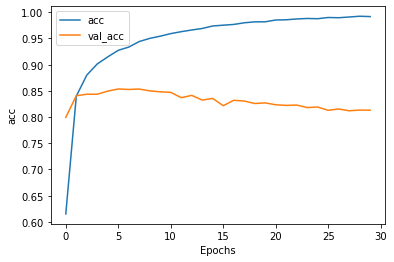

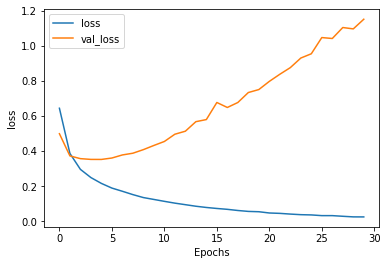

In [57]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")